In [3]:
from ConvLSTMDataset import ConvLSTMDataset
from ConvLSTMDataModule import ConvLSTMDataModule

In [1]:
images_path = "/Users/alexis/Library/CloudStorage/OneDrive-Balayre&Co/Cranfield/Thesis/thesis-github-repository/data/frames/full_dataset_annotated_YOLO/images"
train_dataset_path = "/Users/alexis/Library/CloudStorage/OneDrive-Balayre&Co/Cranfield/Thesis/thesis-github-repository/data/frames/full_dataset_annotated_fpp/train.json"
val_dataset_path = "/Users/alexis/Library/CloudStorage/OneDrive-Balayre&Co/Cranfield/Thesis/thesis-github-repository/data/frames/full_dataset_annotated_fpp/validation.json"
test_dataset_path = "/Users/alexis/Library/CloudStorage/OneDrive-Balayre&Co/Cranfield/Thesis/thesis-github-repository/data/frames/full_dataset_annotated_fpp/test.json"

In [4]:
# Data Module
data_module = ConvLSTMDataModule(
    train_dataset_path=train_dataset_path,
    val_dataset_path=val_dataset_path,
    test_dataset_path=test_dataset_path,
    images_folder=images_path,
    target_size=(640, 640),
    batch_size=1,
    num_workers=1,
)

In [5]:
data_module.setup(
    "train", input_frames=4, output_frames=4
)  # Prepare data for training

In [23]:
input_images, input_bboxes, output_bboxes = data_module.train_dataset[0]

In [25]:
output_bboxes

tensor([[0.6274, 0.6412, 0.7366, 0.7472],
        [0.6275, 0.6398, 0.7371, 0.7467],
        [0.6277, 0.6417, 0.7364, 0.7474],
        [0.6278, 0.6396, 0.7365, 0.7458]])

In [24]:
input_bboxes

tensor([[0.6282, 0.6408, 0.7361, 0.7472],
        [0.6281, 0.6411, 0.7364, 0.7475],
        [0.6276, 0.6409, 0.7367, 0.7472],
        [0.6278, 0.6412, 0.7361, 0.7469]])

In [28]:
# Function to denormalize images
def denormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor


In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to display image with bounding boxes
def display_image_with_bboxes(image, bboxes, title="Image with Bounding Boxes"):
    fig, ax = plt.subplots(1)
    image = denormalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ax.imshow(image.permute(1, 2, 0).clip(0, 1))  # Convert CHW to HWC and clip values

    normalized_xmin, normalized_ymin, normalized_xmax, normalized_ymax = bboxes
    xmin = normalized_xmin * image.shape[2]
    ymin = normalized_ymin * image.shape[1]
    xmax = normalized_xmax * image.shape[2]
    ymax = normalized_ymax * image.shape[1]
    rect = patches.Rectangle(
        (xmin, ymin),
        xmax - xmin,
        ymax - ymin,
        linewidth=1,
        edgecolor="r",
        facecolor="none",
    )
    ax.add_patch(rect)
        

    plt.title(title)
    plt.show()

In [54]:
# Fetch a sample from the training dataset
input_images, input_bboxes, output_bboxes = data_module.train_dataset[0]

In [55]:
normalized_xmin, normalized_ymin, normalized_xmax, normalized_ymax = output_bboxes[0]

In [56]:
normalized_xmin

tensor(0.6274)

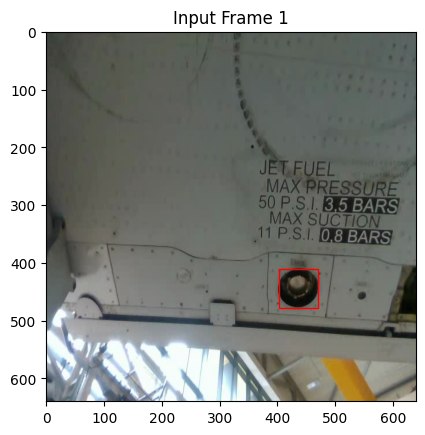

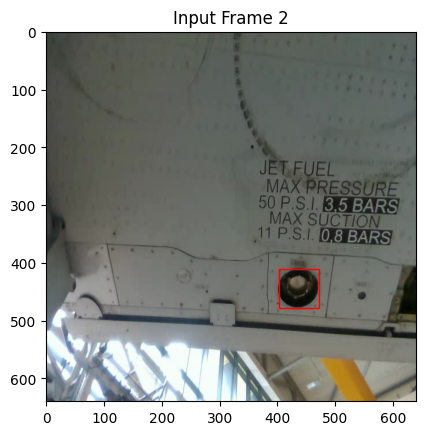

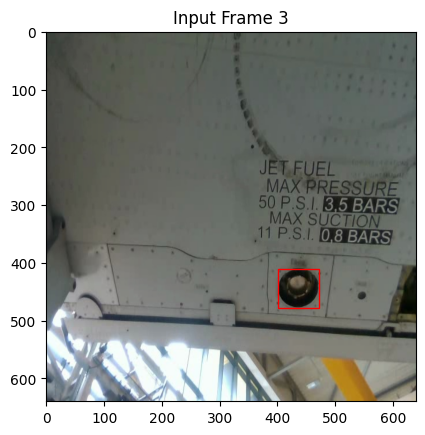

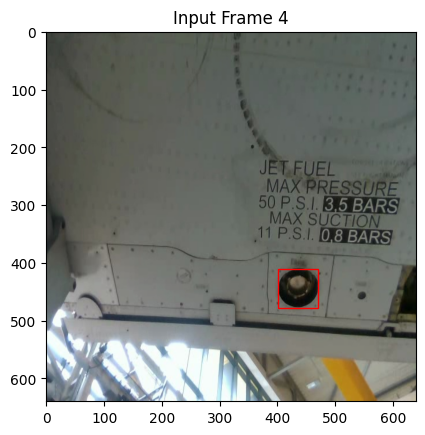

In [60]:
# Fetch a sample from the training dataset
input_images, input_bboxes, output_bboxes = data_module.train_dataset[0]

# Display input frames with bounding boxes
for idx, (image, bbox) in enumerate(zip(input_images, input_bboxes)):
    display_image_with_bboxes(image, bbox, title=f"Input Frame {idx+1}")